<a href="https://colab.research.google.com/github/LennRBriones/neural-networks-practices/blob/main/first_neural_network_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Neural Network example

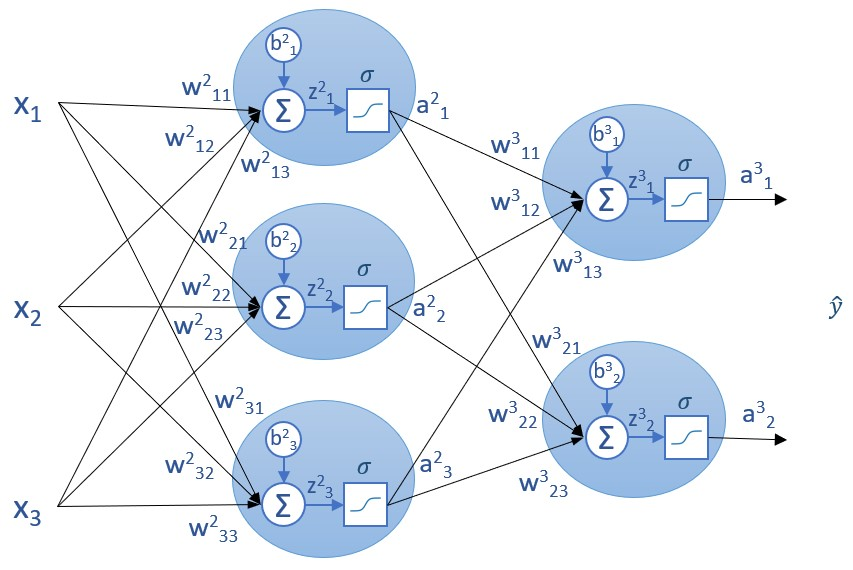

## libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles

In [3]:
N = 1000 #Setting how many examples we need
gaussian_quantiles= make_gaussian_quantiles(mean=None,
                        cov=0.1, #data distribution
                        n_samples = N, 
                        n_features = 2, #two dimensions for our data
                        n_classes = 2, # two classes to solve it
                        shuffle = True ,
                        random_state=None
                        )

X, Y = gaussian_quantiles

In [4]:
X.shape ## 1000 examples with 2 features

(1000, 2)

In [5]:
Y.shape ## 1000 examples, but as vector we need to change it

(1000,)

In [6]:
Y = Y[:, np.newaxis]

## Graph

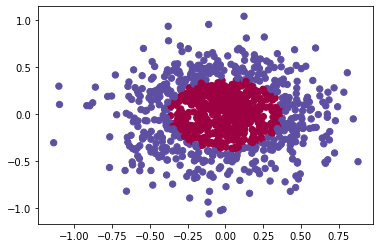

In [7]:
plt.scatter(X[:,0], X[:,1], c=Y[:,0], s=40, cmap=plt.cm.Spectral )

## Activation Functions

In [8]:
def sigmoid(x, derivate = False):
  if derivate:
      return np.exp(-x)/(( np.exp(-x) +1)**2)
  else:
      return 1 / (1 + np.exp(-x))

def relu(x, derivate = False):
    if derivate:
       x[x<=0] = 0
       x[x>0] = 1
       return x
    else:
      return np.maximum(0,x)


## Loss Function

In [9]:
def mse(y,y_hat,derivate=False):
  if derivate:
      return (y_hat - y)
  else:
      return np.mean((y_hat - y)**2)

## Neural network building, weight & bias

In [10]:
def initialize_parameters_deep(layers_dim):
    parameters = {}
    L = len(layers_dim)
    for l in range(0,L-1):
      parameters["W"+str(l+1)] = (np.random.rand(layers_dim[l], layers_dim[l+1]) *2) -1
      #L+1 because the first value is the inpout value
      parameters["b"+str(l+1)] = (np.random.rand(1, layers_dim[l+1]) *2) -1
                                              # Bias always start dimension 1
    return parameters


In [11]:
layer_dims = [2,4,8,1]
params = initialize_parameters_deep(layer_dims)

In [12]:
params

{'W1': array([[-0.95821525, -0.62459789, -0.28561905,  0.64239065],
        [ 0.67321208,  0.50566952,  0.85757252, -0.78286722]]),
 'b1': array([[-0.38294405,  0.57577976, -0.00329054,  0.49294407]]),
 'W2': array([[-0.79160047,  0.78782397, -0.47797743, -0.7478873 ,  0.29895674,
          0.50732187, -0.31916809, -0.21119111],
        [ 0.42213026,  0.25128075,  0.80793295, -0.76572845,  0.32635775,
          0.11569969,  0.41857319, -0.35006509],
        [ 0.5760523 , -0.92469534,  0.64175359, -0.25369726, -0.59470249,
         -0.36255968, -0.13169487, -0.35830287],
        [ 0.91691328, -0.67911266, -0.89652615,  0.86061845, -0.9312603 ,
         -0.80112809,  0.48132192,  0.60442922]]),
 'b2': array([[ 0.25223215, -0.80232735,  0.09464103, -0.69634694,  0.19916154,
          0.96256993,  0.28072602,  0.26795998]]),
 'W3': array([[-0.77743798],
        [ 0.79636072],
        [ 0.49916603],
        [-0.16976779],
        [-0.84891088],
        [ 0.67256533],
        [ 0.05841171],


In [13]:
params["W1"].shape

(2, 4)

In [14]:
X.shape

(1000, 2)

### We need to reshape because the product requieres the same shape in params

In [15]:
np.matmul(X,params["W1"])

array([[ 0.33663449,  0.21829462,  0.08918435, -0.22004955],
       [ 0.52606776,  0.35843668,  0.30939684, -0.42969038],
       [-0.38582772, -0.24386324, -0.0399989 ,  0.22080409],
       ...,
       [-0.35575202, -0.23848279, -0.1708136 ,  0.27118868],
       [-0.35183396, -0.24108825, -0.22034729,  0.29415134],
       [ 0.48447329,  0.34159752,  0.3979574 , -0.45275974]])

In [16]:
np.matmul(X,params["W1"]).shape

(1000, 4)

In [17]:
X@params["W1"]
#Is a shorter way to do the same that matmul

array([[ 0.33663449,  0.21829462,  0.08918435, -0.22004955],
       [ 0.52606776,  0.35843668,  0.30939684, -0.42969038],
       [-0.38582772, -0.24386324, -0.0399989 ,  0.22080409],
       ...,
       [-0.35575202, -0.23848279, -0.1708136 ,  0.27118868],
       [-0.35183396, -0.24108825, -0.22034729,  0.29415134],
       [ 0.48447329,  0.34159752,  0.3979574 , -0.45275974]])

In [60]:
def train(x_data, lr , params , training = True):
    ## Forward
    params["A0"] = x_data # In A0 we use the input value
  
    #Dot product = Z
    params["Z1"] = np.matmul(params["A0"], params["W1"]) + params["b1"]
    params["A1"] = relu(params["Z1"])
    # Activation function is necessary to format, that´s "A"
    # relu is necessary in hidden layers 
  
    # The next layer need the value of the last layer
    params["Z2"] = np.matmul(params["A1"], params["W2"]) + params["b2"]
    params["A2"] = relu(params["Z2"])
  
    params["Z3"] = np.matmul(params["A2"], params["W3"]) + params["b3"]
    params["A3"] = sigmoid(params["Z3"]) #in the last layer is easier using sigmoid because the stadistic distribution
  
    output = params["A3"] #the output of the last activation is the value that do the prediction
  
    if training:
  
        ## Backpropagation
  
        params["dZ3"] = mse(Y, output, True) * sigmoid(params["A3"],True)
        params["dW3"] = np.matmul(params["A2"].T,params["dZ3"])
        # In delta need to use the transposed matrix because the value is in the incorrect form
  
        params["dZ2"] = np.matmul(params["dZ3"], params["W3"].T) * relu(params["A2"], True)
        params["dW2"] = np.matmul(params["A1"].T, params["dZ2"])
  
        params["dZ1"] = np.matmul(params["dZ2"], params["W2"].T) * relu(params["A1"], True)
        params["dW1"] = np.matmul(params["A0"].T, params["dZ1"])
        # As we can see, backpropagation is the opposite that the forward
  
  
        ##  Gradient descent
  
        params["W3"] = params["W3"] - params["dW3"] * lr
        params["b3"] = params["b3"] - np.mean(params["dW3"], axis=0, keepdims=True) * lr
        
        params["W2"] = params["W2"] - params["dW2"] * lr
        params["b2"] = params["b2"] - np.mean(params["dW2"], axis=0, keepdims=True) * lr
  
        params["W1"] = params["W1"] - params["dW1"] * lr
        params["b1"] = params["b1"] - np.mean(params["dW1"], axis=0, keepdims=True) * lr
  
    return output

In [61]:
output

array([[0.42763407],
       [0.44461063],
       [0.55062733],
       [0.44352829],
       [0.44625709],
       [0.63855382],
       [0.42166832],
       [0.5082944 ],
       [0.53232971],
       [0.48419416],
       [0.51117967],
       [0.39803971],
       [0.49317807],
       [0.42877147],
       [0.43104237],
       [0.44254448],
       [0.43961855],
       [0.43624426],
       [0.62765412],
       [0.5676335 ],
       [0.73197143],
       [0.43828943],
       [0.51012253],
       [0.44357121],
       [0.43571737],
       [0.4862738 ],
       [0.46616161],
       [0.46354152],
       [0.43269528],
       [0.49356646],
       [0.53191783],
       [0.52207676],
       [0.44768976],
       [0.48138667],
       [0.49760131],
       [0.46525346],
       [0.60563143],
       [0.45189461],
       [0.52623116],
       [0.70188289],
       [0.47079117],
       [0.47417333],
       [0.56842701],
       [0.55899329],
       [0.47196151],
       [0.49919397],
       [0.45737138],
       [0.422

In [20]:
output.shape

(1000, 1)

In [21]:
params["dZ3"].shape

(1000, 1)

In [22]:
params["A2"].shape

(1000, 8)

## Training

In [72]:
layer_dims = [2,4,8,1]
params = initialize_parameters_deep(layer_dims)
errors = []
for _ in range(50000):
    output = train(X,0.001,params)
    if _ % 25 == 0:
       print(mse(Y,output))
       errors.append(mse(Y,output))

0.2599678101641395
0.24765259773146409
0.24457061405745312
0.24116353666299992
0.23665172599448095
0.23115678024192213
0.22516459312130177
0.21946486523241765
0.21335766181729462
0.20728322497910012
0.2018549556113483
0.19736588969677932
0.19373388435236877
0.19101049745722076
0.18895576367813244
0.1870638758488695
0.18504036981007893
0.18318647344302144
0.18084835420571801
0.1782719522944217
0.17481315499261887
0.17115932871200062
0.16907421409126214
0.1687516370399516
0.16954722764490232
0.17218515662510764
0.17174694967553886
0.17017261269957742
0.16777222117469254
0.1755792318291515
0.17786569053097478
0.17523819318437292
0.18722158191209917
0.1850246096382639
0.17846302111651008
0.18321764625316775
0.19926052055721483
0.1749589132553155
0.18240709535958888
0.171624365955048
0.1792530895837752
0.17458689842731712
0.19497936262828233
0.19648751521445842
0.20563366065488883
0.18719754718744155
0.1950955820001465
0.20211063641268362
0.20682216283019728
0.2229884717184039
0.22497066433

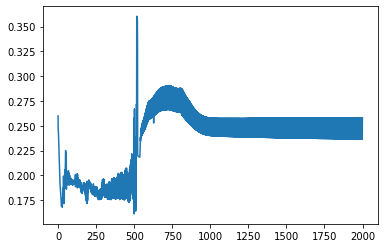

In [73]:
plt.plot(errors)

## We can try with differents values

In [74]:
layer_dims = [2,4,8,1]
params = initialize_parameters_deep(layer_dims)
errors = []
for _ in range(20000):
    output = train(X,0.0001,params)
    if _ % 25 == 0:
       print(mse(Y,output))
       errors.append(mse(Y,output))

0.3448777874214328
0.28798032567962345
0.2706056796610967
0.26499188335272916
0.2624397328686351
0.2607919716703114
0.2594761223679026
0.2583503331785365
0.25734981925472494
0.2564276788200716
0.25557662599809405
0.254793164113978
0.25406196582072915
0.2533663232259729
0.2526987126322772
0.2520731275550452
0.2514934415889107
0.2509591438014807
0.25046811782988604
0.2500212908609435
0.2496134599633338
0.24923763488286113
0.2488916509875397
0.24856606635774897
0.2482636643221751
0.24798274565128195
0.2477152249870919
0.24746339956816027
0.24722317610134853
0.24699286528069006
0.246772217566231
0.24656235268751128
0.2463576183803829
0.24616098516434043
0.2459693526446776
0.24578162719090554
0.24560186409874285
0.24542598103704172
0.24525481550096512
0.24508643797409083
0.24491920653920193
0.2447540741879195
0.24459085685455825
0.24442868526711767
0.24426662004848818
0.2441053914476469
0.24394366401137768
0.24378164185392598
0.24361680900271854
0.24345126749348087
0.2432823760623953
0.2431

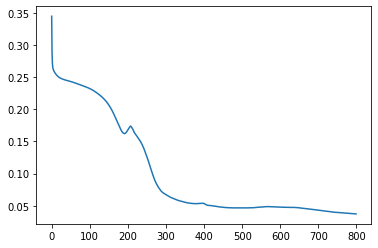

In [75]:
plt.plot(errors)

In [76]:
layer_dims = [2,4,8,1]
params = initialize_parameters_deep(layer_dims)
errors = []
for _ in range(60000):
    output = train(X,0.0001,params)
    if _ % 25 == 0:
       print(mse(Y,output))
       errors.append(mse(Y,output))

0.25313840801200777
0.2528365288575558
0.2525524630614159
0.25228173761004963
0.25202078271713124
0.2517686493153565
0.25152070618794087
0.2512752051868779
0.25102989421834715
0.25078235288810163
0.2505207768242112
0.25023035391764187
0.24988311429698248
0.24934159057558816
0.2480909446473996
0.2467548822502032
0.24609879923349792
0.24565484194343848
0.24532772827967836
0.2450195856965732
0.24469258636812313
0.24435597787544797
0.24402833208450506
0.24370865618924867
0.24338839941124638
0.24305800842273959
0.2427324967585051
0.24239759097969163
0.24206545061572238
0.24172427658215126
0.24137921237814597
0.24106076324079626
0.24073563405474413
0.24039859472027303
0.2400554863478004
0.23969955895023493
0.23933352615505257
0.23896971080249102
0.23860980125244852
0.23825237573633434
0.23790290955605228
0.23756166131084042
0.23722044972236644
0.23688062291551495
0.23654080933600494
0.2361922970389137
0.23584251264003858
0.23549528887249818
0.23514354736128287
0.23478968861786442
0.234441809

In [87]:
layer_dims = [2,4,8,1]
params = initialize_parameters_deep(layer_dims)
errors = []
for _ in range(20000):
    output = train(X,0.001,params)
    if _ % 25 == 0:
       print(mse(Y,output))
       errors.append(mse(Y,output))

0.45319659988704564
0.2424774716260099
0.23331411298368696
0.2212829266917343
0.20593939195073563
0.18765175987017665
0.1693634871452182
0.15780825890556907
0.15372382257547967
0.15593320431770769
0.1687549409006435
0.16424498394714454
0.16145120410464767
0.1583742097998337
0.1560767915107549
0.1537758415708544
0.1516821896358779
0.1497295599080988
0.14769630714118495
0.1462572797679691
0.1451620404729145
0.14540476627560106
0.14657256033081625
0.14783686693295192
0.1494449434678656
0.1507782144720025
0.15117646795147233
0.1477140933927942
0.14756067756951327
0.14745366246827166
0.14736821958368967
0.14716029047570314
0.1468498549453111
0.14656249917704806
0.14627074546550814
0.14634533788854445
0.14624180787039023
0.14606622734718513
0.14610302228660885
0.1460129384161389
0.14593809466615498
0.14577284729270332
0.14541908461718958
0.14503641054659977
0.14464022919925879
0.14421054382793774
0.14380682551109505
0.14336311052852704
0.14287309724315014
0.14237984738685755
0.14190286227681

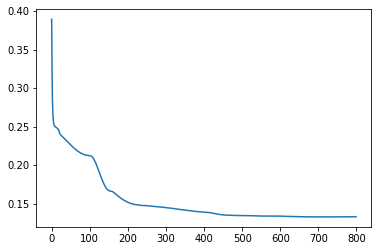

In [83]:
plt.plot(errors)

In [89]:
data_test = (np.random.rand(1000,2) * 2) -1
y = train(data_test,0.0001,params,training=False)

In [90]:
y = np.where(y >= 0.51, 1, 0)

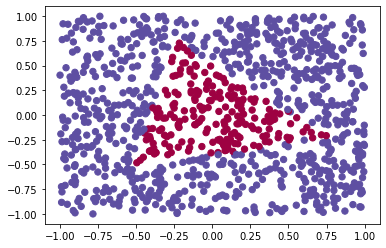

In [91]:
plt.scatter(data_test[:,0], data_test[:,1], c=y[:,0], s=40, cmap=plt.cm.Spectral)